In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '../')
from spiral_resources import return_dict, return_df
from sfr_methods import get_sfr

/home/sshamsi/miniconda3/envs/marvin/lib/python3.9/site-packages/marvin/core/exceptions.py:50: UserWarning: cannot initiate Sentry error reporting: [Errno 25] Inappropriate ioctl for device.
  warnings.warn('cannot initiate Sentry error reporting: {0}.'.format(str(ee)),
[INFO]: No release version set. Setting default to MPL-11


In [2]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [3]:
sample_paths = np.load('../Selecting_Sample/final_sample_paths.npy', allow_pickle=True)

In [4]:
dict_list = [return_dict(path) for path in sample_paths]
df_list = [return_df(dic) for dic in dict_list]

In [5]:
main_df = pd.DataFrame(dict_list)

In [6]:
main_df

,filepath,filename,mangaid,z,d_mpc,d_kpc,d_m,delta,spax_area,map_shape,eff_rad,mass,theta,elpetro_ba
0,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-178542_127_14718985.fits.gz,1-178542,0.047790,204.670881,204670.880726,6.315483e+24,3.505340e+08,0.246151,"(74, 74)",13.902880,1.674050e+10,1.051229,0.453211
1,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-91339_19_14714965.fits.gz,1-91339,0.065066,278.662229,278662.229010,8.598618e+24,6.497918e+08,0.456295,"(34, 34)",9.873160,4.574310e+10,0.282045,0.540568
2,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-51315_91_14711988.fits.gz,1-51315,0.037050,158.674580,158674.580445,4.896186e+24,2.106846e+08,0.147946,"(62, 62)",14.039920,2.877250e+10,-0.060882,0.934826
3,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-94066_19_14715173.fits.gz,1-94066,0.024731,105.917532,105917.531961,3.268274e+24,9.387581e+07,0.065921,"(32, 32)",25.073200,1.451890e+10,1.248329,0.875249
4,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-145679_127_14717443.fits.gz,1-145679,0.037423,160.274616,160274.615621,4.945558e+24,2.149550e+08,0.150945,"(74, 74)",17.389280,4.016650e+10,-1.253637,0.745144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-603974_127_14742254.fits.gz,1-603974,0.037260,159.574386,159574.386094,4.923951e+24,2.130808e+08,0.149629,"(74, 74)",20.448000,4.224700e+10,-1.049597,0.757748
1478,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-176187_127_14718908.fits.gz,1-176187,0.040647,174.081506,174081.505881,5.371594e+24,2.535848e+08,0.178072,"(72, 72)",10.053471,5.801990e+09,-0.049927,0.613864
1479,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-2604_61_14709580.fits.gz,1-2604,0.022508,96.395267,96395.266945,2.974447e+24,7.775520e+07,0.054601,"(54, 54)",12.202950,3.087942e+09,1.417701,0.591830
1480,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-352635_127_14727022.fits.gz,1-352635,0.024939,106.805774,106805.774187,3.295682e+24,9.545693e+07,0.067032,"(74, 74)",29.776000,2.818810e+10,-0.468984,0.974412


In [7]:
tot_sfr_list = []
sig_tot_sfr_list = []
tot_sp_sfr_list = []
sig_tot_sp_sfr_list = []
df_list_len = len(df_list)

for idx, df in enumerate(df_list):
    bin_df = df.dropna()
    bin_df = bin_df[(bin_df.ha_spax_healthy == True) & (bin_df.hb_spax_healthy == True) & (bin_df.comp == False) &
                    (bin_df.agn == False) & (bin_df.seyfert == False) & (bin_df.liner == False)]
    sp_bin_df = bin_df[bin_df.sp_33 == True]
    
    if len(bin_df) == 0:
        sfr, sig_sfr = np.nan, np.nan
    else:
        sfr, sig_sfr = get_sfr(bin_df.index.to_numpy(), df, dict_list[idx])
        
    if len(sp_bin_df) == 0:
        sp_sfr, sig_sp_sfr = np.nan, np.nan
    else:
        sp_sfr, sig_sp_sfr = get_sfr(sp_bin_df.index.to_numpy(), df, dict_list[idx])
        
    tot_sfr_list.append(sfr)
    sig_tot_sfr_list.append(sig_sfr)
    tot_sp_sfr_list.append(sp_sfr)
    sig_tot_sp_sfr_list.append(sig_sp_sfr)
    
    if idx % 50 == 0:
        print(df_list_len - idx, 'galaxies remain')

1482 galaxies remain
1432 galaxies remain
1382 galaxies remain
1332 galaxies remain
1282 galaxies remain
1232 galaxies remain
1182 galaxies remain
1132 galaxies remain
1082 galaxies remain
1032 galaxies remain
982 galaxies remain
932 galaxies remain
882 galaxies remain
832 galaxies remain
782 galaxies remain
732 galaxies remain
682 galaxies remain
632 galaxies remain
582 galaxies remain
532 galaxies remain
482 galaxies remain
432 galaxies remain
382 galaxies remain
332 galaxies remain
282 galaxies remain
232 galaxies remain
182 galaxies remain
132 galaxies remain
82 galaxies remain
32 galaxies remain


In [8]:
main_df['tot_sfr'] = tot_sfr_list
main_df['sig_tot_sfr'] = sig_tot_sfr_list

main_df['tot_sp_33_sfr'] = tot_sp_sfr_list
main_df['sig_tot_sp_33_sfr'] = sig_tot_sp_sfr_list

In [9]:
main_df['pc_tot_spiral_sfr'] = 100 * main_df['tot_sp_33_sfr'] / main_df['tot_sfr']
main_df['sig_pc_tot_spiral_sfr'] = main_df['pc_tot_spiral_sfr'] * ((main_df['sig_tot_sp_33_sfr'] / main_df['tot_sp_33_sfr']) +
                                                                   (main_df['sig_tot_sfr'] / main_df['tot_sfr']))

In [18]:
main_df[main_df.pc_tot_spiral_sfr > 100]

,filepath,filename,mangaid,z,d_mpc,d_kpc,d_m,delta,spax_area,map_shape,eff_rad,mass,theta,elpetro_ba,tot_sfr,sig_tot_sfr,tot_sp_33_sfr,sig_tot_sp_33_sfr,pc_tot_spiral_sfr,sig_pc_tot_spiral_sfr
18,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-55170_127_14712269.fits.gz,1-55170,0.147977,633.746866,633746.866174,1.955538e+25,3.360854e+09,2.360051,"(74, 74)",11.306014,2.427536e+11,1.445103,0.721855,5.193737e-06,1.766761e-07,0.000077,0.000002,1.490919e+03,9.518363e+01
125,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-178027_37_14718964.fits.gz,1-178027,0.044889,192.249194,192249.194366,5.932190e+24,3.092766e+08,0.217179,"(44, 44)",5.889820,1.973410e+10,-0.201490,0.643657,5.897167e-02,2.055333e-02,0.138029,0.132662,2.340600e+02,3.065351e+02
338,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-268479_127_14722891.fits.gz,1-268479,0.044961,192.557981,192557.980598,5.941718e+24,3.102709e+08,0.217878,"(74, 74)",28.645400,2.484140e+11,-0.573794,0.616352,5.213764e-01,8.084842e-03,0.667792,0.020069,1.280825e+02,5.835282e+00
375,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-244527_127_14721784.fits.gz,1-244527,0.064521,276.328452,276328.451793,8.526605e+24,6.389534e+08,0.448684,"(74, 74)",17.619166,1.776763e+11,-1.291125,0.516757,1.672753e-01,1.698967e-02,0.418467,0.238631,2.501667e+02,1.680663e+02
423,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-548190_37_14739490.fits.gz,1-548190,0.021748,93.140377,93140.377401,2.874012e+24,7.259287e+07,0.050976,"(44, 44)",9.182080,5.641610e+09,-0.437655,0.863013,1.208680e-04,6.771791e-05,0.000185,0.000136,1.529138e+02,1.983430e+02
485,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-195761_127_14719578.fits.gz,1-195761,0.092060,394.270852,394270.851969,1.216593e+25,1.300790e+09,0.913438,"(72, 72)",10.110487,9.672715e+10,0.916591,0.872411,1.339574e-01,3.152975e-02,0.153128,0.040278,1.143109e+02,5.697328e+01
502,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-285916_127_14723789.fits.gz,1-285916,0.132899,569.173113,569173.112511,1.756285e+25,2.710858e+09,1.903612,"(72, 72)",10.488740,2.214450e+11,-1.434607,0.816003,1.667249e+00,1.515919e-01,1.729528,0.159232,1.037355e+02,1.898254e+01
557,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-178686_127_14718990.fits.gz,1-178686,0.052178,223.464870,223464.869918,6.895405e+24,4.178655e+08,0.293433,"(72, 72)",17.021900,1.307500e+10,-0.418052,0.450889,3.173386e+00,4.052519e-02,3.642309,0.048985,1.147767e+02,3.009345e+00
605,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-55572_61_14712295.fits.gz,1-55572,0.045427,194.552457,194552.456994,6.003262e+24,3.167316e+08,0.222415,"(52, 52)",13.232000,7.351830e+10,1.020389,0.841642,7.329693e-01,3.443753e-02,0.775740,0.031019,1.058353e+02,9.204497e+00
777,/home/sshamsi/sas/mangawork/manga/sandbox/gala...,1-298623_61_14724079.fits.gz,1-298623,0.099628,426.683042,426683.042048,1.316606e+25,1.523452e+09,1.069795,"(52, 52)",7.939560,5.349040e+10,0.581387,0.757488,1.599528e-02,3.368878e-02,7.966727,0.144526,4.980674e+04,1.058050e+05


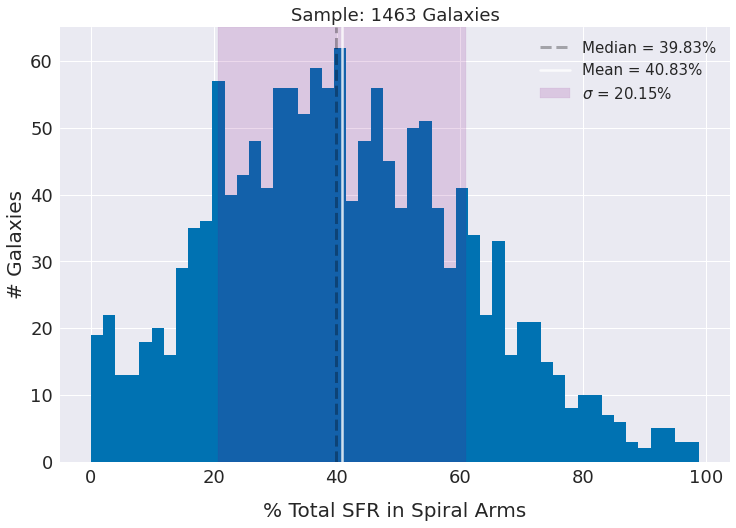

In [19]:
filtered_df = main_df[main_df.pc_tot_spiral_sfr <= 100]
series = filtered_df['pc_tot_spiral_sfr']

plt.figure(figsize=(12, 8))

plt.hist(series, bins=50)

plt.xlabel('% Total SFR in Spiral Arms', size=20, labelpad=15)
plt.ylabel('# Galaxies', size=20)

plt.xticks(size=18)
plt.yticks(size=18)

mean_series = series.mean()
median_series = series.median()
stdv_series = series.std()

plt.axvline(median_series, linestyle='--', linewidth=3, alpha=0.3, color='k',
            label='Median = {:.4}%'.format(median_series))
plt.axvline(mean_series, linestyle='-', linewidth=2.5, alpha=0.8, color='white',
            label='Mean = {:.4}%'.format(mean_series))

plt.axvspan(mean_series - stdv_series, mean_series + stdv_series, alpha=0.15, color='purple',
            label='$\sigma$ = {:.4}%'.format(stdv_series))

plt.title('Sample: {} Galaxies'.format(len(series)), size=18)
plt.legend(fontsize=15)

### Memory usage by the DFs combined (not including the list they are in):

In [ ]:
tot_mem = 0

for df in df_list:
    tot_mem += df.memory_usage(deep=True).sum()

In [ ]:
tot_mem #in bytes

995668552

In [ ]:
tot_mem / 1024**2 #memory usage in MBs. Not bad?

949.5435256958008

### Now for the % spiral spaxels vs % SFR in spirals plot

In [20]:
n_spiral_spax = []
n_nspiral_spax = []

for i in range(len(df_list)):
    filename = dict_list[i]['filename'].split('.')[0]
    df = pd.read_pickle('../Form_Resources/DFs/' + filename + '.df.pkl')
    
    galdf = df.copy()
    
    galdf = galdf.dropna()
    galdf = galdf[(df['$r/r_e$'] < 1.5) & (df['$r/r_e$'] > 0.1)]
    galdf = galdf[(df['Comp'] == 0) & (df['AGN'] == 0) & (df['Seyfert'] == 0) & (df['Liner'] == 0)]
    
    n_spiral = len(galdf[(galdf['Spiral Arm (3, 3)'] == True) & (galdf['Nonspiral Arm (3, 3)'] == False)])
    n_nspiral = len(galdf[galdf['Nonspiral Arm (3, 3)'] == True])
    
    n_spiral_spax.append(n_spiral)
    n_nspiral_spax.append(n_nspiral)

<ipython-input-20-ee83cf32664d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  galdf = galdf[(df['$r/r_e$'] < 1.5) & (df['$r/r_e$'] > 0.1)]
<ipython-input-20-ee83cf32664d>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  galdf = galdf[(df['Comp'] == 0) & (df['AGN'] == 0) & (df['Seyfert'] == 0) & (df['Liner'] == 0)]
<ipython-input-20-ee83cf32664d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  galdf = galdf[(df['$r/r_e$'] < 1.5) & (df['$r/r_e$'] > 0.1)]
<ipython-input-20-ee83cf32664d>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  galdf = galdf[(df['Comp'] == 0) & (df['AGN'] == 0) & (df['Seyfert'] == 0) & (df['Liner'] == 0)]
<ipython-input-20-ee83cf32664d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  galdf = galdf[(df['$r/r_e$'] < 1.5) & (df['$r/r_e$'] > 0.1)]
<ipython-input-20-ee83cf32664d>:12: UserWarning: Boolea

In [21]:
main_df['Number of Spiral Spaxels'] = n_spiral_spax
main_df['Number of Nonspiral Spaxels'] = n_nspiral_spax

In [23]:
main_df['Total Counted Spaxels'] = main_df['Number of Spiral Spaxels'] + main_df['Number of Nonspiral Spaxels']

main_df['% Spiral Spaxels'] = 100 * main_df['Number of Spiral Spaxels'] / main_df['Total Counted Spaxels']

main_df['% Total SFR in Spirals/ % Spiral Spaxels'] = main_df['pc_tot_spiral_sfr'] / main_df['% Spiral Spaxels']

In [35]:
filtered_ratio_df = main_df[main_df['% Total SFR in Spirals/ % Spiral Spaxels'] < 6]

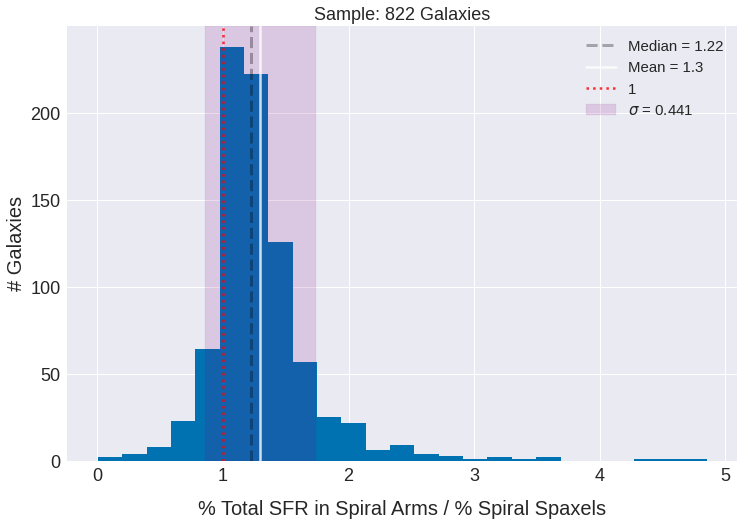

In [36]:
series = filtered_ratio_df['% Total SFR in Spirals/ % Spiral Spaxels']

plt.figure(figsize=(12, 8))

plt.hist(series, bins=25)

plt.xlabel('% Total SFR in Spiral Arms / % Spiral Spaxels', size=20, labelpad=15)
plt.ylabel('# Galaxies', size=20)

plt.xticks(size=18)
plt.yticks(size=18)

mean_series = series.mean()
median_series = series.median()
stdv_series = calculate_stdv(series)

plt.axvline(median_series, linestyle='--', linewidth=3, alpha=0.3, color='k',
            label='Median = {:.3}'.format(median_series))
plt.axvline(mean_series, linestyle='-', linewidth=2.5, alpha=0.8, color='white',
            label='Mean = {:.3}'.format(mean_series))
plt.axvline(1, linestyle=':', linewidth=2.5, alpha=0.8, color='red',
            label='1')

plt.axvspan(mean_series - stdv_series, mean_series + stdv_series, alpha=0.15, color='purple',
            label='$\sigma$ = {:.3}'.format(stdv_series))

plt.title('Sample: {} Galaxies'.format(len(series)), size=18)
plt.legend(fontsize=15)

In [38]:
weird_gals = main_df[main_df['pc_tot_spiral_sfr'] > 100]

weird_gals

,filepath,filename,mangaid,z,d_mpc,d_kpc,d_m,delta,spax_area,map_shape,...,"sig_tot_nonspiral_sfr (7, 7)","tot_combined_sfr (7, 7)","sig_tot_combined_sfr (7, 7)",pc_tot_spiral_sfr,sig_pc_tot_spiral_sfr,Number of Spiral Spaxels,Number of Nonspiral Spaxels,Total Counted Spaxels,% Spiral Spaxels,% Total SFR in Spirals/ % Spiral Spaxels
35,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-135030_127_14716858.fits.gz,1-135030,0.027329,117.042830,117042.830078,3.611564e+24,1.146325e+08,0.080497,"(74, 74)",...,1.630304e-16,9.335178e-15,1.740468e-16,2.326513e+16,1.539071e+15,708,1047,1755,40.341880,5.766992e+14
36,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-135057_127_14716866.fits.gz,1-135057,0.028852,123.565029,123565.029139,3.812818e+24,1.277642e+08,0.089718,"(74, 74)",...,2.096330e-01,5.090953e-01,2.101167e-01,2.647016e+03,1.323067e+04,600,1756,2356,25.466893,1.039395e+02
60,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-146026_61_14717469.fits.gz,1-146026,0.022600,96.787995,96787.995065,2.986565e+24,7.839006e+07,0.055047,"(54, 54)",...,4.228636e-03,3.477512e-01,2.294328e-02,1.000481e+02,1.066047e+01,509,28,537,94.785847,1.055517e+00
240,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-247037_19_14721913.fits.gz,1-247037,0.037193,159.287870,159287.870159,4.915110e+24,2.123163e+08,0.149092,"(34, 34)",...,2.843944e-03,1.224195e-02,2.843944e-03,2.246087e+03,6.344293e+02,186,153,339,54.867257,4.093674e+01
298,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-266039_127_14722797.fits.gz,1-266039,0.035044,150.086811,150086.811348,4.631195e+24,1.884964e+08,0.132365,"(74, 74)",...,7.400237e-06,2.681442e-04,7.400237e-06,6.322317e+05,4.369302e+04,917,1652,2569,35.694823,1.771214e+04
300,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-268479_127_14722891.fits.gz,1-268479,0.044961,192.557981,192557.980598,5.941718e+24,3.102709e+08,0.217878,"(74, 74)",...,6.255233e-03,1.171490e-01,6.255233e-03,4.834313e+02,7.341126e+01,568,1757,2325,24.430108,1.978834e+01
349,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-285916_127_14723789.fits.gz,1-285916,0.132899,569.173113,569173.112511,1.756285e+25,2.710858e+09,1.903612,"(72, 72)",...,3.911572e-01,6.928317e-01,4.143845e-01,1.068660e+02,1.010557e+02,379,104,483,78.467909,1.361907e+00
633,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-55170_127_14712269.fits.gz,1-55170,0.147977,633.746866,633746.866174,1.955538e+25,3.360854e+09,2.360051,"(74, 74)",...,7.601861e-07,6.161745e-06,1.343108e-06,2.655877e+03,8.861309e+02,243,196,439,55.353075,4.798066e+01
721,/home/sshamsi_haverford_edu/sas/mangawork/mang...,1-606221_127_14742705.fits.gz,1-606221,0.024563,105.196437,105196.436879,3.246023e+24,9.260193e+07,0.065027,"(72, 72)",...,1.724773e-04,2.950655e-03,1.729968e-04,1.746477e+04,1.707020e+03,630,2046,2676,23.542601,7.418368e+02
